As pastas e arquivos em "Compartilhado comigo" não aparecem diretamente como pastas normais no Google Drive montado no Colab.
Uma maneira de acessar essas pastas é criando um atalho para essa pasta no "Meu Drive".

Vá até a pasta "Compartilhado comigo" no seu Google Drive através do navegador.
Clique com o botão direito na pasta ou arquivo que você deseja copiar.
Selecione "Organizar" e "Adicionar atalho ao Meu Drive".
Escolha onde deseja colocar o atalho dentro do "Meu Drive".

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')


!cp -r "/content/drive/My Drive/Dataset" "/content/"



Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.listdir('/content/drive/My Drive/Dataset'))

['train.csv', 'train_images', 'train.gsheet', 'train_test_data.csv', 'Deteccao de cancer de mama.v2i.yolov8.zip', 'yolo_data', 'data', 'runs', 'runs_teste', 'config-dataset.yaml']


In [ ]:
import pandas as pd

# Lê o arquivo CSV
df = pd.read_csv('/content/Dataset/train.csv')

# Seleciona a coluna 'image_id'
id_column = df[ 'image_id']

# Cria uma lista com os IDs das imagens
image_ids = id_column.tolist()

# Imprime a lista de IDs
print(image_ids)

[388811999, 613462606, 1360338805, 1672636630, 461614796, 530620473, 773597682, 1803952236, 458553546, 1434858530, 195400299, 605115808, 1967460233, 76321767, 2018825992, 797737008, 1095412840, 311168378, 1696075167, 1222121284, 1774497291, 420829283, 888426604, 1326732476, 1869230850, 1086977375, 1417771843, 1882170663, 1926447510, 1820235658, 1915182298, 1096308702, 1810004579, 199041775, 671458270, 1069030033, 1812305728, 1007401721, 1017363921, 457443056, 1767654639, 1203123196, 1652537920, 1827516400, 91797551, 100147863, 740439778, 1429876928, 1127855363, 2025746473, 1995339680, 2026358482, 982883275, 1420153030, 1225478313, 1717036504, 1446339465, 1563019139, 212923136, 220808925, 382701440, 1852393673, 156027166, 1289574047, 1297379916, 1435663649, 610792199, 835777184, 551129512, 1191890529, 345896545, 739781139, 234842188, 238763713, 739383742, 1222788247, 1789731455, 2024785721, 1187678911, 1360800566, 1949261883, 338330540, 1475901500, 740921229, 834999110, 1210098281, 1928

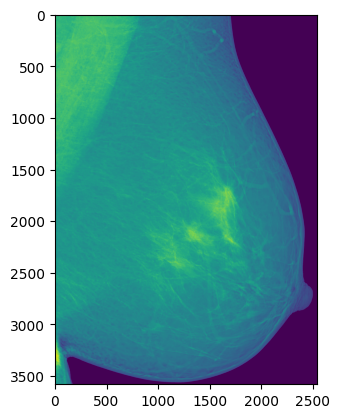

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Caminho relativo após fazer o upload da imagem
imagem = Image.open("/content/Dataset/train_images/60442@787281164.png")

# Exibe usando Pillow (Image.show())
imagem.show()

# Ou exibe usando matplotlib
plt.imshow(imagem)
plt.show()

In [ ]:
import os
import pandas as pd

# Define o diretório do dataset
# alterar a string com o nome do diretório onde se encontram as imagens do dataset
dataset_dir = '/content/Dataset/train_images/'

# Lê o arquivo CSV
df = pd.read_csv('/content/Dataset/train.csv')


# Itera sobre os arquivos no diretório
for filename in os.listdir(dataset_dir):
    # Verifica se o arquivo é um arquivo PNG
    if filename.endswith(".png"):
        # Divide o nome do arquivo em partes usando '@' como separador
        parts = filename.split('@')
        # Pega a parte que vem depois do '@'
        part_after_at = parts[1]
        # Remove a extensão '.png'
        image_id = part_after_at[:-4]
        # Adiciona o ID da imagem à lista
        image_ids.append(image_id)

# Compara os IDs das imagens com o 'image_id' do CSV
for image_id in image_ids:
    # Verifica se o ID da imagem está presente no CSV
    if image_id in df['image_id'].values:
        print(f"O ID da imagem '{image_id}' está presente no CSV.")


O ID da imagem '388811999' está presente no CSV.
O ID da imagem '613462606' está presente no CSV.
O ID da imagem '1360338805' está presente no CSV.
O ID da imagem '1672636630' está presente no CSV.
O ID da imagem '461614796' está presente no CSV.
O ID da imagem '530620473' está presente no CSV.
O ID da imagem '773597682' está presente no CSV.
O ID da imagem '1803952236' está presente no CSV.
O ID da imagem '458553546' está presente no CSV.
O ID da imagem '1434858530' está presente no CSV.
O ID da imagem '195400299' está presente no CSV.
O ID da imagem '605115808' está presente no CSV.
O ID da imagem '1967460233' está presente no CSV.
O ID da imagem '76321767' está presente no CSV.
O ID da imagem '2018825992' está presente no CSV.
O ID da imagem '797737008' está presente no CSV.
O ID da imagem '1095412840' está presente no CSV.
O ID da imagem '311168378' está presente no CSV.
O ID da imagem '1696075167' está presente no CSV.
O ID da imagem '1222121284' está presente no CSV.
O ID da imag

In [ ]:
import numpy as np
from skimage.exposure import equalize_hist
from skimage.filters.rank import median
from skimage.measure import regionprops
from skimage.morphology import disk
from skimage.segmentation import felzenszwalb
from skimage.transform import rescale
from scipy.ndimage import binary_fill_holes
#from scipy.misc import imresize
from PIL import Image


def breast_segment(im, scale_factor=0.25, threshold=3900, felzenzwalb_scale=0.15):

    # set threshold to remove artifacts around edges
    im_thres = im.copy()
    im_thres[im_thres > threshold] = 0

    # determine breast side
    col_sums_split = np.array_split(np.sum(im_thres, axis=0), 2)
    left_col_sum = np.sum(col_sums_split[0])
    right_col_sum = np.sum(col_sums_split[1])

    if left_col_sum > right_col_sum:
        breast_side = 'l'
    else:
        breast_side = 'r'

    # rescale and filter aggressively, normalize
    im_small = rescale(im_thres, scale_factor)
    im_small_filt = median(im_small, disk(50))   #50
    # this might not be helping, actually sometimes it is
    im_small_filt = equalize_hist(im_small_filt)

    # run mr. felzenzwalb
    segments = felzenszwalb(im_small_filt, scale=felzenzwalb_scale)
    segments += 1  # otherwise, labels() would ignore segment with segment=0

    props = regionprops(segments)

    props_sorted = sorted(props, key=lambda x: x.area, reverse=True)

    expected_bg_index = 0 #0
    bg_index = expected_bg_index

    bg_region = props_sorted[bg_index]
    minr, minc, maxr, maxc = bg_region.bbox
    filled_mask = bg_region.filled_image


    im_small_fill = np.zeros((im_small_filt.shape[0]+2, im_small_filt.shape[1]+1), dtype=int)


    if breast_side == 'l':
        # breast expected to be on left side,
        # pad on right and bottom side
        im_small_fill[minr+1:maxr+1, minc:maxc] = filled_mask
        im_small_fill[0, :] = 1  # top
        im_small_fill[-1, :] = 1  # bottom
        im_small_fill[:, -1] = 1  # right
    elif breast_side == 'r':
        # breast expected to be on right side,
        # pad on left and bottom side
        im_small_fill[minr+1:maxr+1, minc+1:maxc+1] = filled_mask  # shift mask to right side
        im_small_fill[0, :] = 1  # top
        im_small_fill[-1, :] = 1  # bottom
        im_small_fill[:, 0] = 1  # left

    #print("------")
    #print(type(im_small_fill))


    im_small_fill = binary_fill_holes(im_small_fill)

    im_small_mask = im_small_fill[1:-1, :-1] if breast_side == 'l' \
                  else im_small_fill[1:-1, 1:]
    shape = (im.shape[1],im.shape[0])
    im_mask = np.array(Image.fromarray(im_small_mask).resize(shape)).astype(bool)

    # invert!
    im_mask = ~im_mask

    # determine side of breast in mask and compare
    col_sums_split = np.array_split(np.sum(im_mask, axis=0), 2)
    left_col_sum = np.sum(col_sums_split[0])
    right_col_sum = np.sum(col_sums_split[1])

    if left_col_sum > right_col_sum:
        breast_side_mask = 'l'
    else:
        breast_side_mask = 'r'

    if breast_side_mask != breast_side:
        print('breast and mask side mismatch. inverting!')
        im_mask = ~im_mask

    # if no region found, abort early and return mask of complete image
    if im_mask.ravel().sum() == 0:
        all_mask = np.ones_like(im).astype(bool)
        bbox = (0, 0, im.shape[0], im.shape[1])
        print('Couldn\'t find any segment')
        return all_mask, bbox

    # get bbox
    minr = np.argwhere(im_mask.any(axis=1)).ravel()[0]
    maxr = np.argwhere(im_mask.any(axis=1)).ravel()[-1]
    minc = np.argwhere(im_mask.any(axis=0)).ravel()[0]
    maxc = np.argwhere(im_mask.any(axis=0)).ravel()[-1]

    bbox = (minr, minc, maxr, maxc)

    return im_mask, bbox

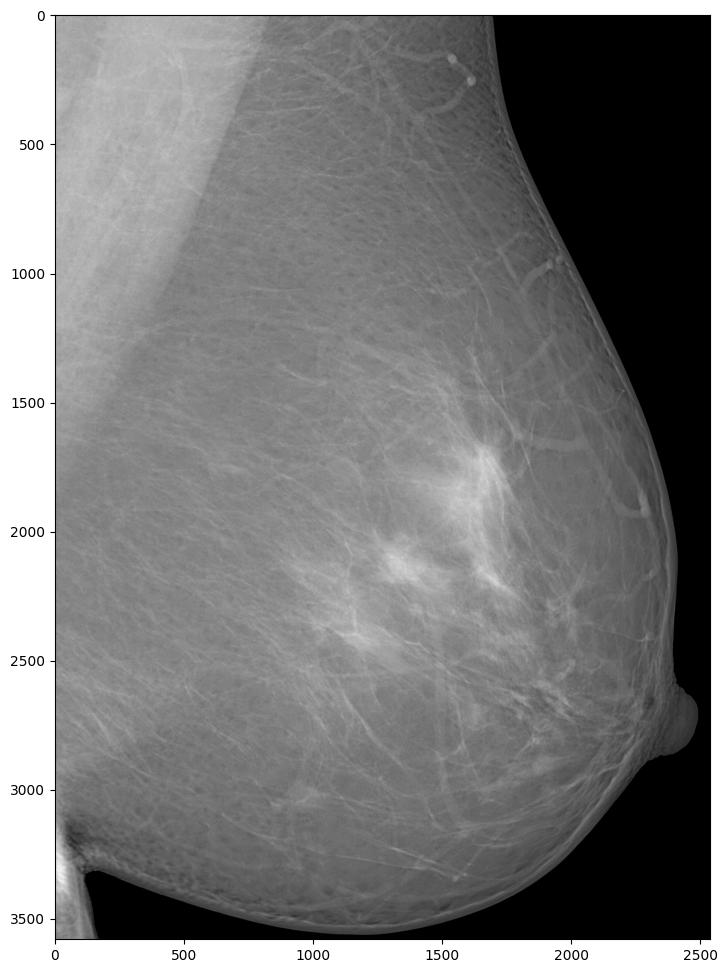

In [ ]:
import cv2

imagem = cv2.imread("/content/Dataset/train_images/60442@787281164.png")

f, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(imagem[:,:,0], cmap='gray')

<ipython-input-9-0586c4768c2e>:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask, bbox = breast_segment(im, scale_factor=1, threshold=30000)


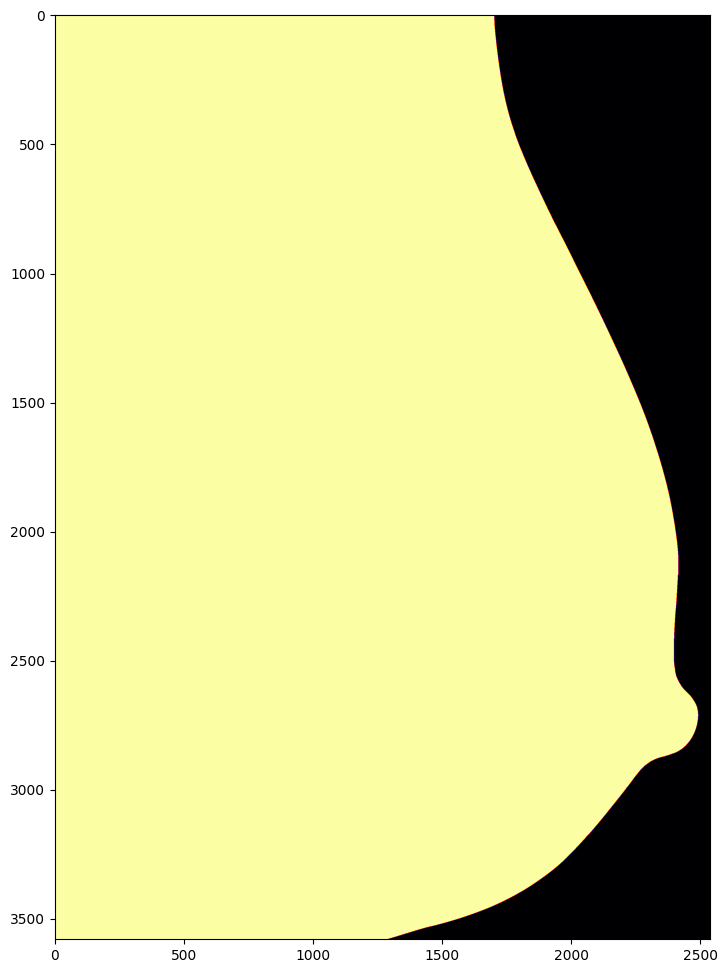

In [ ]:
im = imagem[:,:,0]
im.shape
mask, bbox = breast_segment(im, scale_factor=1, threshold=30000)
f, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(mask, cmap='inferno')

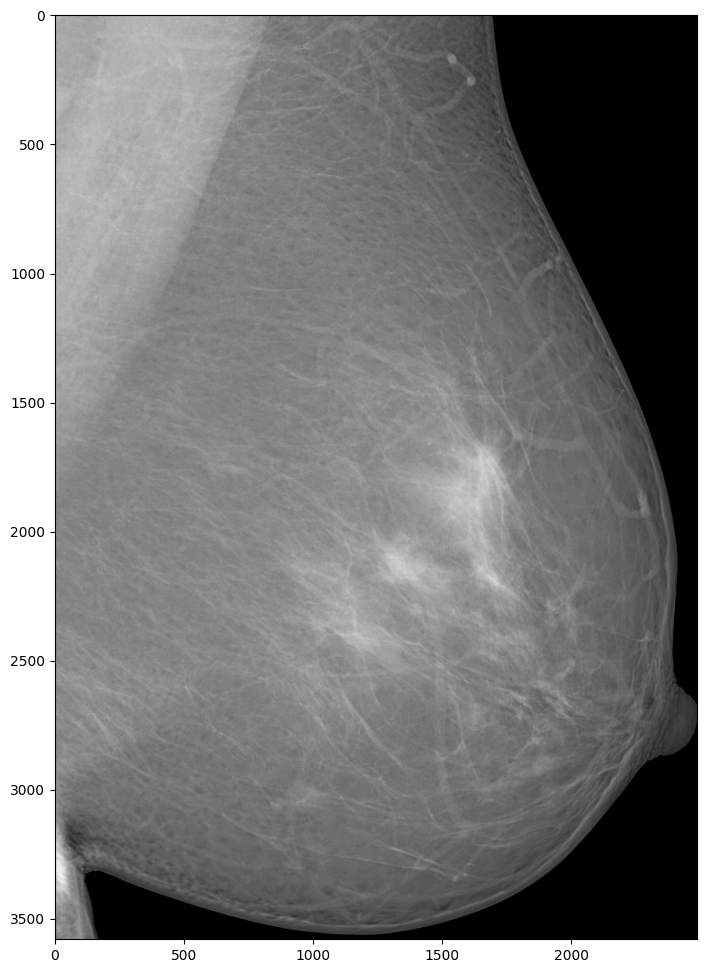

In [ ]:
def get_segment_crop(img,tol=0, mask=None):
    if mask is None:
        mask = img > tol
    return img[np.ix_(mask.any(1), mask.any(0))]

tt = get_segment_crop(im, mask=mask)

f = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
ax.imshow(tt, cmap='gray')

Coordenadas da mama dentro da imagem cortada

In [ ]:
bbox

(0, 0, 3579, 2488)

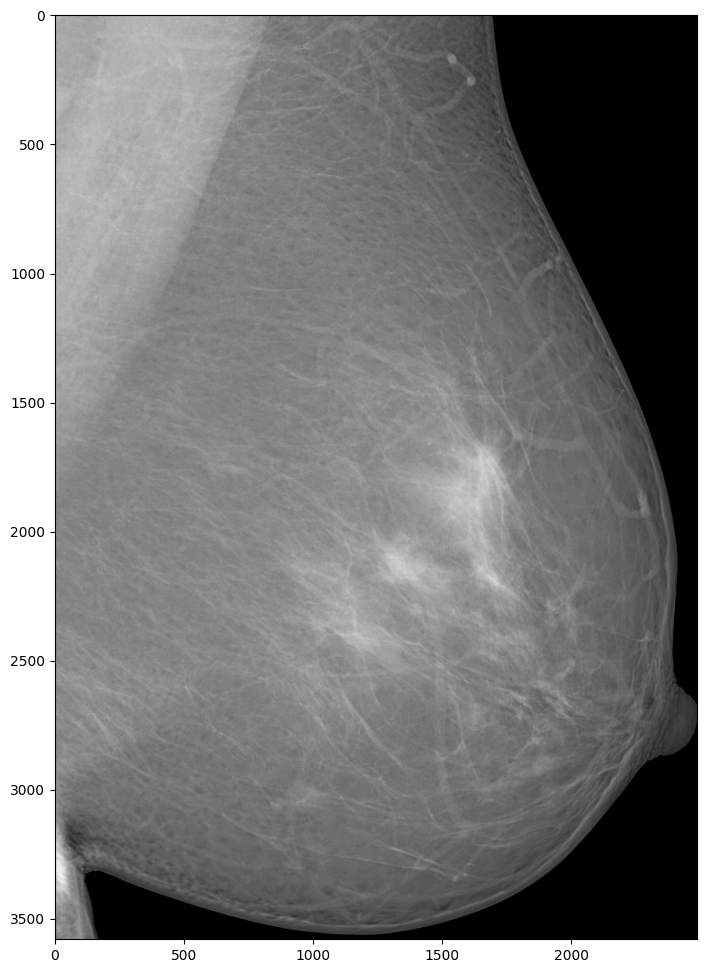

In [ ]:
def get_segment_crop(img,tol=0, mask=None):
    if mask is None:
        mask = img > tol
    return img[np.ix_(mask.any(1), mask.any(0))]

tt = get_segment_crop(im, mask=mask)

f = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
ax.imshow(tt, cmap='gray')

Ambiente YOLOv8


In [ ]:
!nvidia-smi

import os
HOME = os.getcwd()
print(HOME)

Tue Aug 27 22:40:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Organização das pastas

In [ ]:
"""
/content/Dataset/yolo_data/
    ├── images/
    │   ├── train/
    │   │   └── image1.png
    │   │   └── image2.png
    │   └── val/
    │       └── image1.png
    │       └── image2.png
    └── labels/
        ├── train/
        │   └── image1.txt
        │   └── image2.txt
        └── val/
            └── image1.txt
            └── image2.txt
"""

'\n/content/Dataset/yolo_data/\n    ├── images/\n    │   ├── train/\n    │   │   └── image1.png\n    │   │   └── image2.png\n    │   └── val/\n    │       └── image1.png\n    │       └── image2.png\n    └── labels/\n        ├── train/\n        │   └── image1.txt\n        │   └── image2.txt\n        └── val/\n            └── image1.txt\n            └── image2.txt\n'

Baixando dados direto do roboFlow

OBS: após baixa o dataset do roboFlow, precisa mudar o data.yaml da pasta que irá carregar nos arquivos baixados do roboFlow:

names:
- tumor
nc: 1
roboflow:
  license: CC BY 4.0
  project: deteccao-de-cancer-de-mama
  url: https://universe.roboflow.com/cancermama/deteccao-de-cancer-de-mama/dataset/4
  version: 4
  workspace: cancermama
test: /content/Detecção-de-cancer-de-mama-4/test/images
train: /content/Detecção-de-cancer-de-mama-4/train/images
val: /content/Detecção-de-cancer-de-mama-4/valid/images




In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LI13ZQA79SIl20yJjW2L")
project = rf.workspace("cancermama").project("deteccao-de-cancer-de-mama")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detecção-de-cancer-de-mama-4 in yolov8:: 100%|██████████| 160/160 [00:00<00:00, 4935.38it/s]


Proximo passo treinar o modelo

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 114MB/s] 
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

Matrix e Resultados

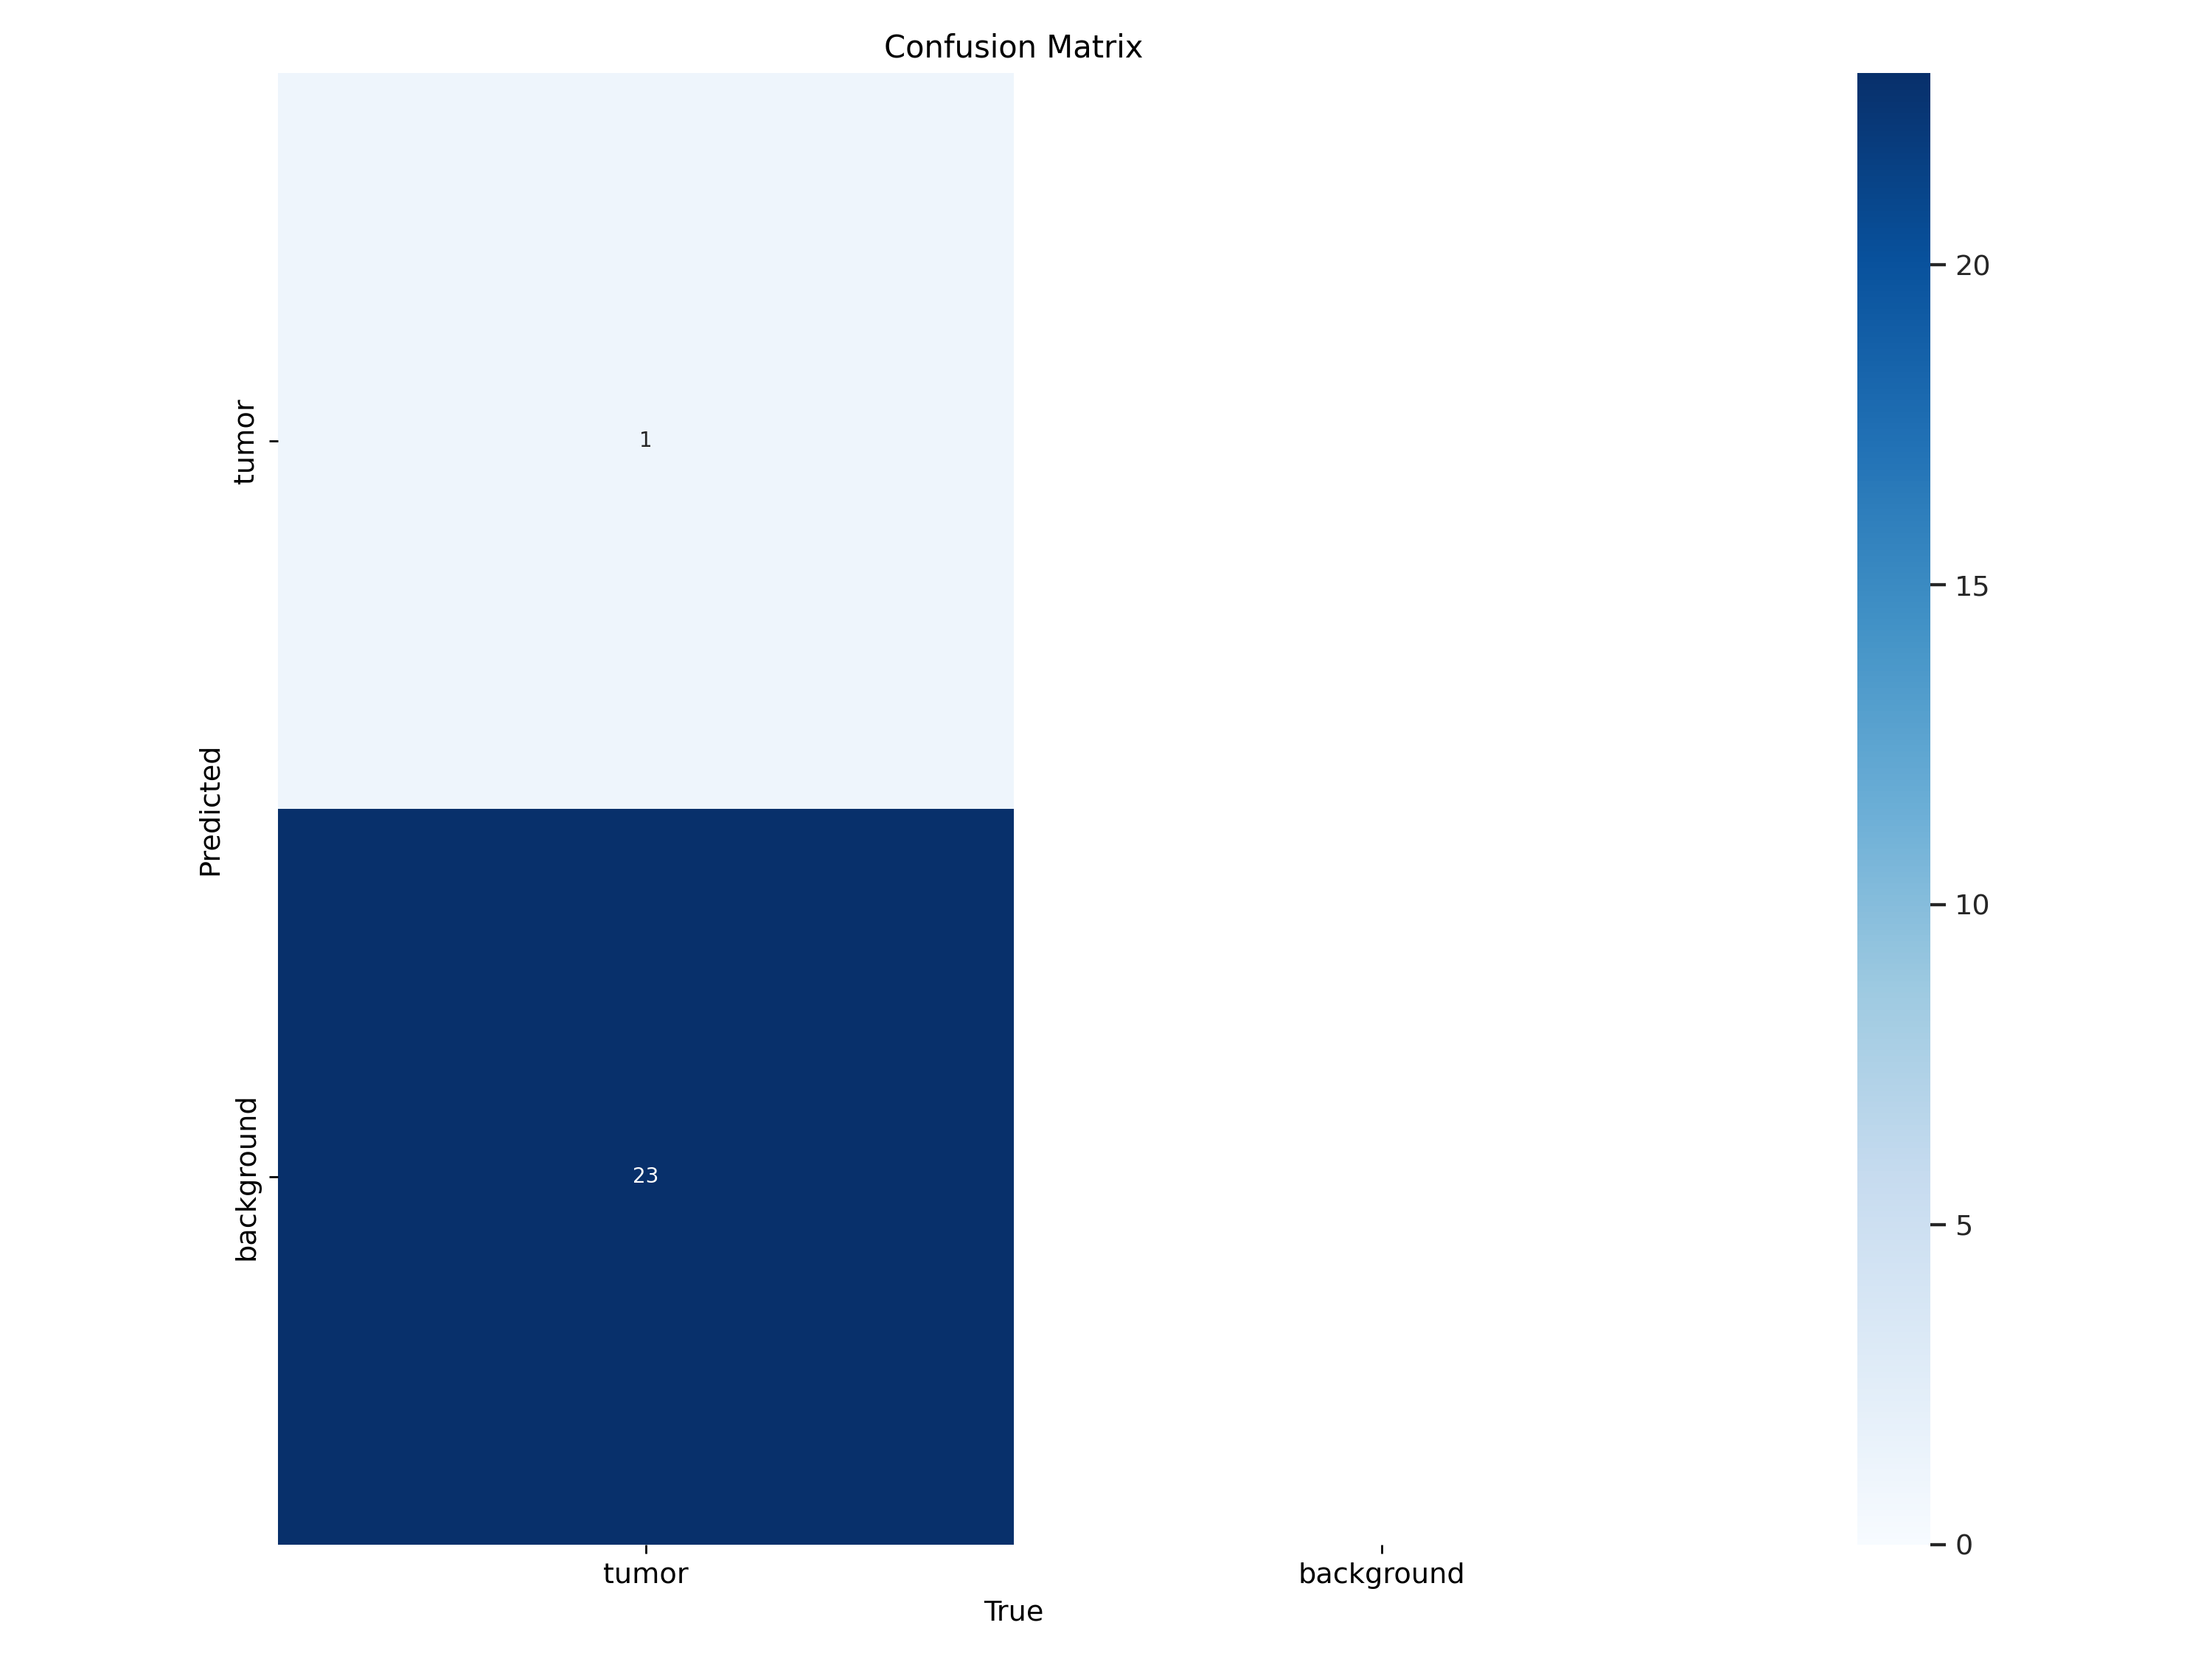

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

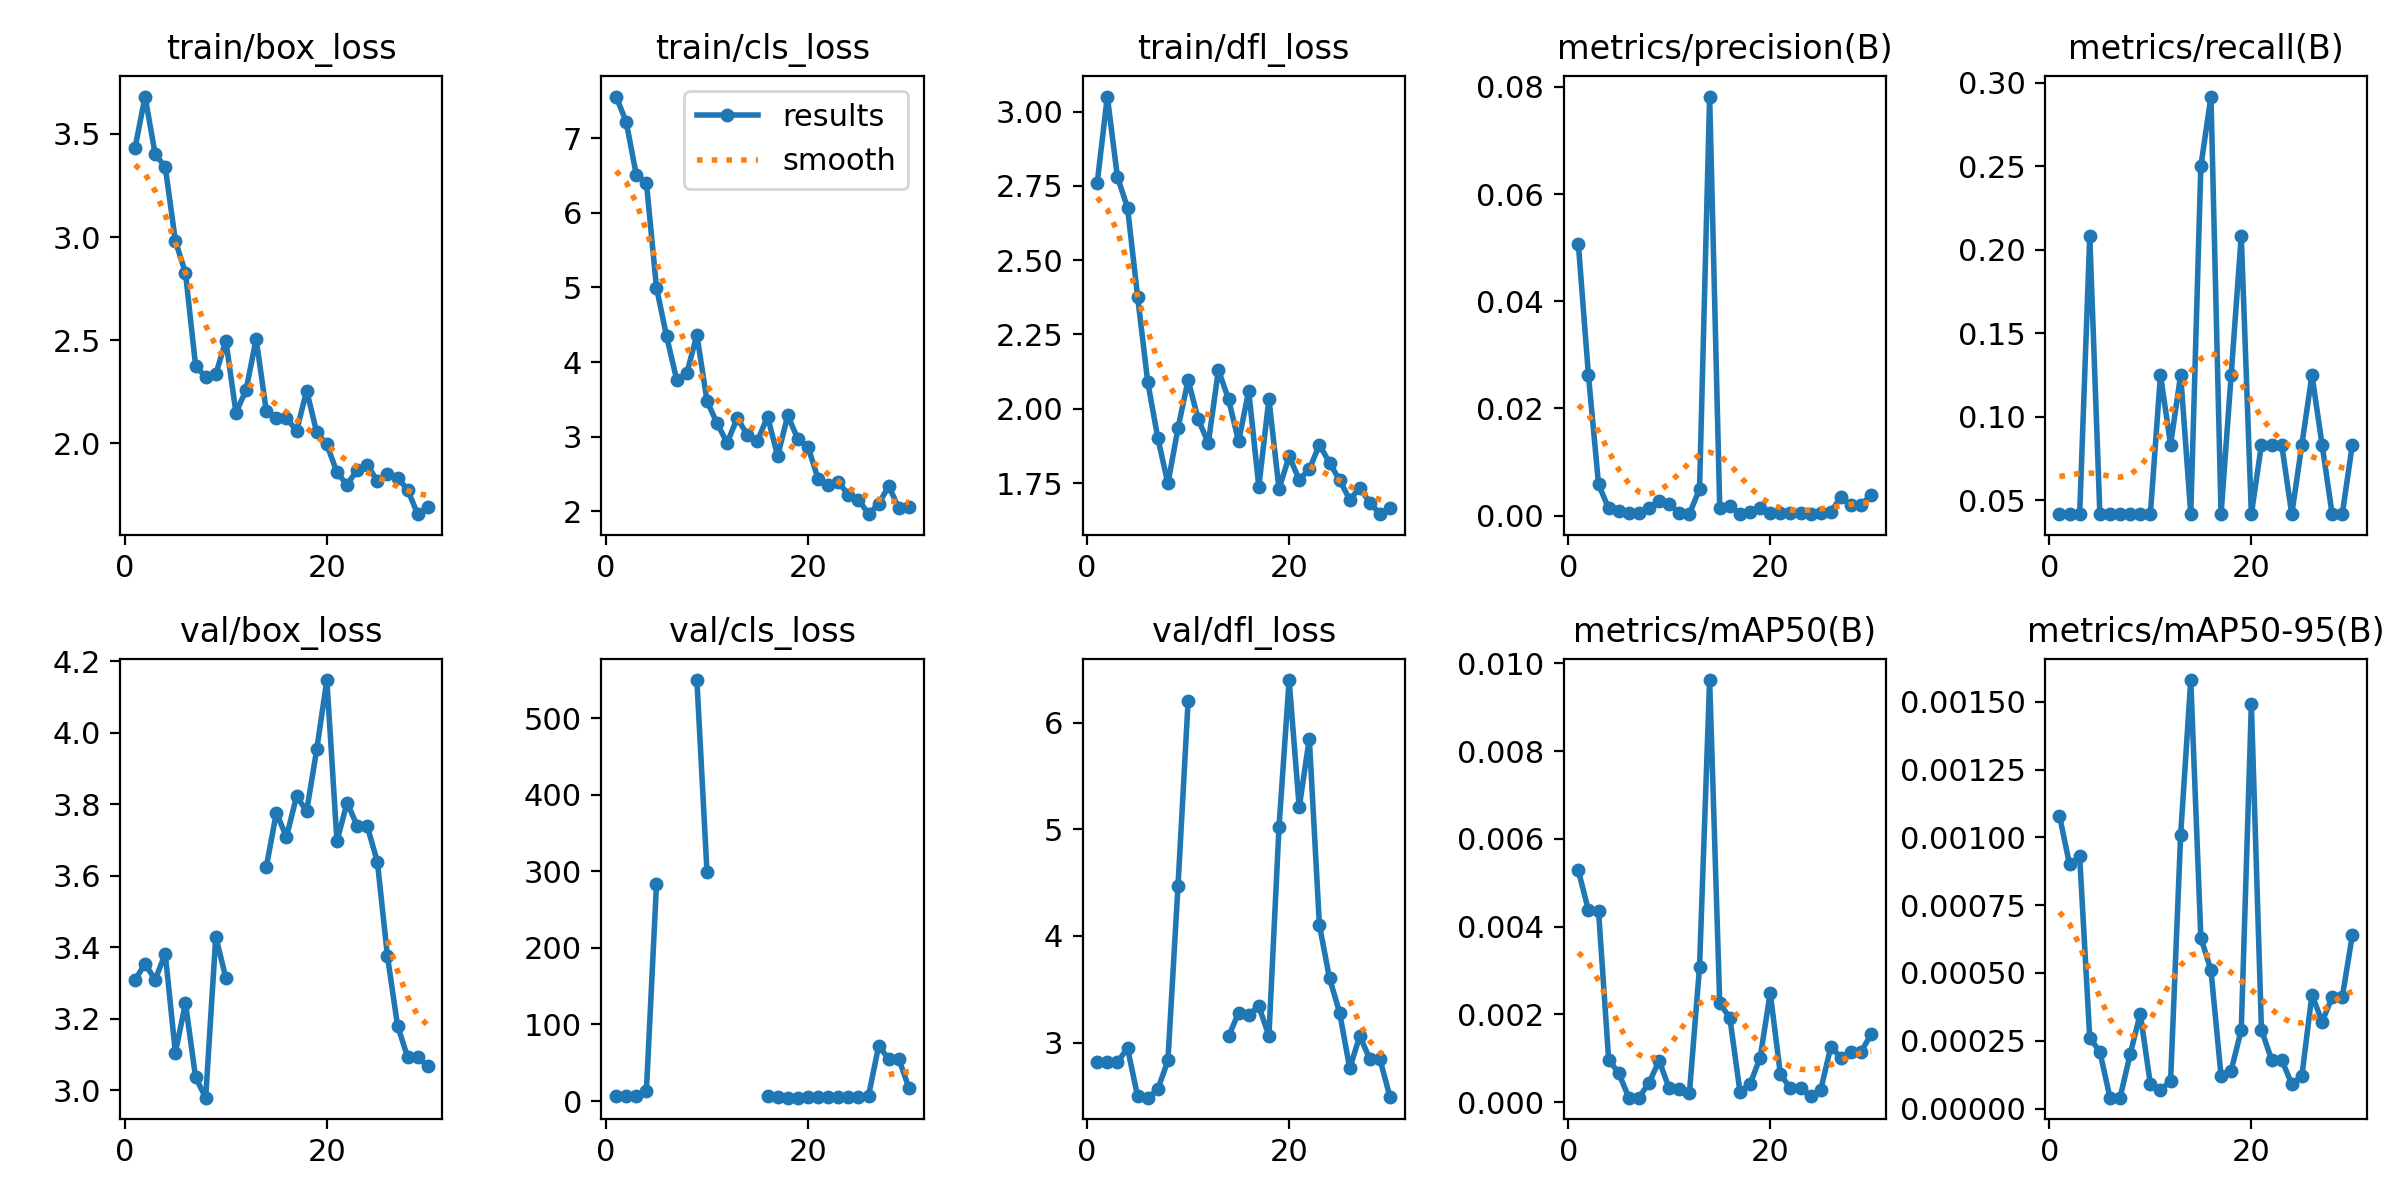

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

Validação das imagens

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


Prediction e Teste

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


Necessário criar um novo diretório predict onde serão armazenadas as imagens do dataset de teste

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict10/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")